In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

In [2]:
#Data Read
df_istanbul = pd.read_csv('/Users/iremn/PythonClass/Spiced/Personal_Projects/Weather/ECA_blended_custom/TG_STAID000248.txt', header = 14)

In [3]:
df_istanbul.columns = ['Source ID', 'Date', 'Mean Temp*10', 'Qual']

In [4]:
df_istanbul['Date'] = pd.to_datetime(df_istanbul['Date'], format="%Y%m%d")

In [5]:
#New DF from Suspect
df_istanbul_suspect = df_istanbul[df_istanbul['Qual'] == 1]


In [6]:
#Remove data Qual = 9
df_istanbul = df_istanbul[df_istanbul['Qual'] != 9]


In [7]:
df_istanbul['Real_temp'] = df_istanbul['Mean Temp*10']/10

In [8]:
df_istanbul.head()

,Source ID,Date,Mean Temp*10,Qual,Real_temp
0,101231,1929-01-01,126,0,12.6
1,101231,1929-01-02,133,0,13.3
2,101231,1929-01-03,131,0,13.1
3,101231,1929-01-04,118,0,11.8
4,101231,1929-01-05,106,0,10.6


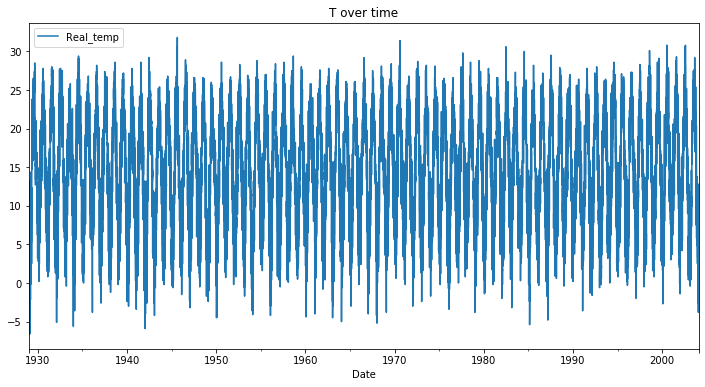

In [9]:
#Plot
df_istanbul.plot(x = 'Date', y= 'Real_temp', figsize=(12,6), title='T over time')


# De-trend this 

In [10]:
#Linear
df_istanbul['lin_difference'] = df_istanbul['Real_temp'].diff()
df_istanbul.head()

,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference
0,101231,1929-01-01,126,0,12.6,NaN
1,101231,1929-01-02,133,0,13.3,0.7
2,101231,1929-01-03,131,0,13.1,-0.2
3,101231,1929-01-04,118,0,11.8,-1.3
4,101231,1929-01-05,106,0,10.6,-1.2


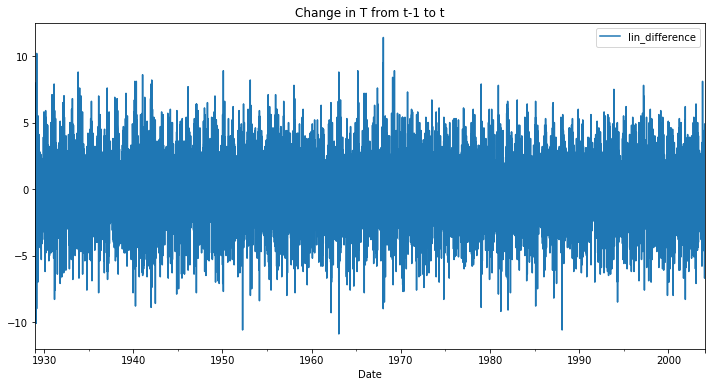

In [11]:
df_istanbul.plot(x = 'Date', y= 'lin_difference',figsize=(12,6), title='Change in T from t-1 to t')
plt.show()

In [12]:
#Check if it is linear
df_istanbul['lin_difference'].mean() # so it is linear - there is no exponential increase

-0.00029172592349487807

# By rolling mean #

In [13]:
df_istanbul['rolling_mean'] = df_istanbul['Real_temp'].rolling(365, center=True).mean()
df_istanbul.head()

,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference,rolling_mean
0,101231,1929-01-01,126,0,12.6,NaN,NaN
1,101231,1929-01-02,133,0,13.3,0.7,NaN
2,101231,1929-01-03,131,0,13.1,-0.2,NaN
3,101231,1929-01-04,118,0,11.8,-1.3,NaN
4,101231,1929-01-05,106,0,10.6,-1.2,NaN


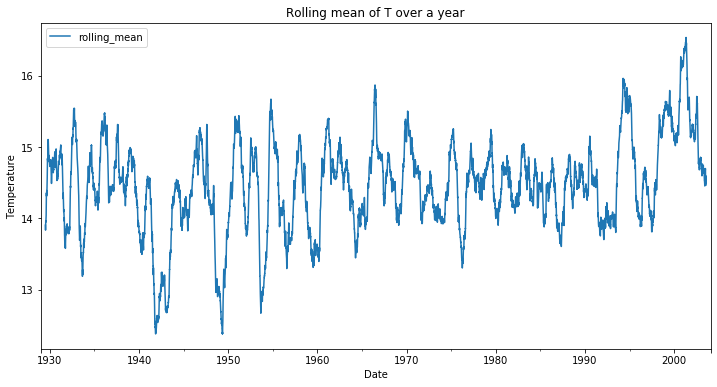

In [14]:
df_istanbul.plot(x = 'Date', y= 'rolling_mean', figsize=(12, 6))
plt.title('Rolling mean of T over a year')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

In [15]:
df_istanbul['de-trended'] = df_istanbul['Real_temp'] - df_istanbul['rolling_mean']
df_istanbul.head()

,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference,rolling_mean,de-trended
0,101231,1929-01-01,126,0,12.6,NaN,NaN,NaN
1,101231,1929-01-02,133,0,13.3,0.7,NaN,NaN
2,101231,1929-01-03,131,0,13.1,-0.2,NaN,NaN
3,101231,1929-01-04,118,0,11.8,-1.3,NaN,NaN
4,101231,1929-01-05,106,0,10.6,-1.2,NaN,NaN


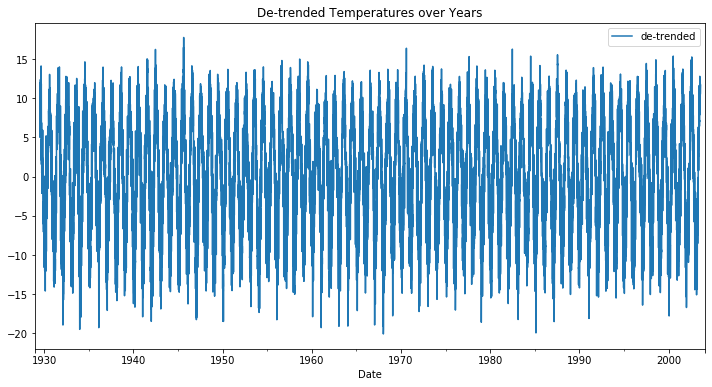

In [16]:
#Plot
df_istanbul.plot(x = 'Date', y= 'de-trended',figsize=(12,6), title='De-trended Temperatures over Years')

# Remove change in volatility if any

In [17]:
df_istanbul['log_y'] = np.log(df_istanbul['Real_temp'])
df_istanbul['log_diff'] = df_istanbul.log_y.diff()
df_istanbul.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference,rolling_mean,de-trended,log_y,log_diff
0,101231,1929-01-01,126,0,12.6,NaN,NaN,NaN,2.533697,NaN
1,101231,1929-01-02,133,0,13.3,0.7,NaN,NaN,2.587764,0.054067
2,101231,1929-01-03,131,0,13.1,-0.2,NaN,NaN,2.572612,-0.015152
3,101231,1929-01-04,118,0,11.8,-1.3,NaN,NaN,2.468100,-0.104513
4,101231,1929-01-05,106,0,10.6,-1.2,NaN,NaN,2.360854,-0.107246


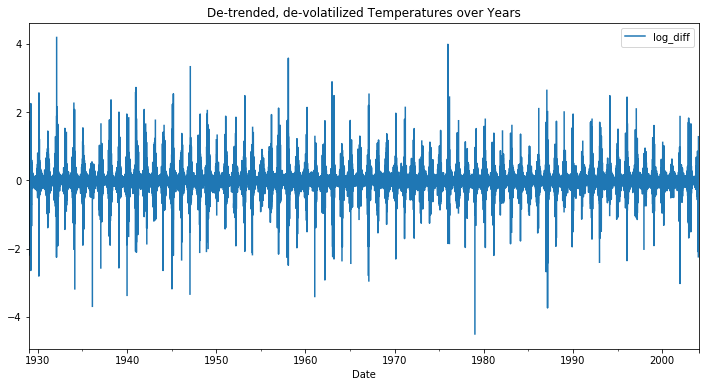

In [18]:
#Plot
df_istanbul.plot(x = 'Date', y= 'log_diff',figsize=(12,6), title='De-trended, de-volatilized Temperatures over Years')

In [22]:
#Make a month column

In [25]:
df_istanbul['Month'] = df_istanbul['Date'].dt.month

# Take out the seasonality by grouping in months 

In [26]:
df_istanbul['monthly_mean'] = df_istanbul.groupby('Month')['log_diff'].transform('mean')


In [27]:
df_istanbul['de-seasonalized'] = df_istanbul['log_diff'] - df_istanbul['monthly_mean']

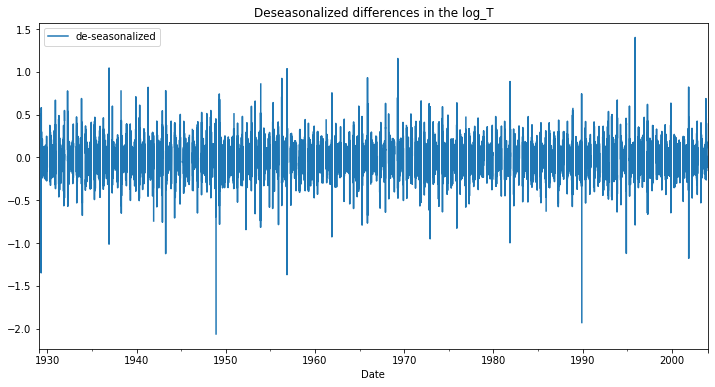

In [28]:
df_istanbul.plot(x='Date', y ='de-seasonalized', figsize=(12,6), title='Deseasonalized differences in the log_T')

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
df_istanbul_reind = df_istanbul.set_index('Date')

Figure(432x288)


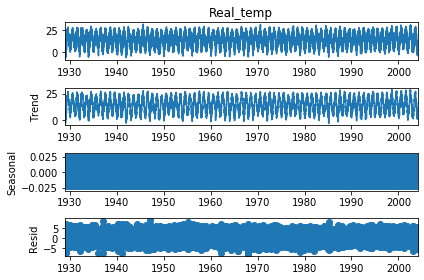

In [31]:
decompose = seasonal_decompose(df_istanbul_reind['Real_temp'], model='additive')
print(decompose.plot())

# Is it centeralized around normal? (ie zero and a symmetric distribution) 

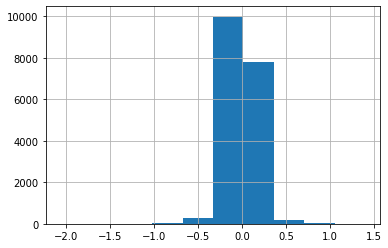

In [32]:
df_istanbul['de-seasonalized'].hist(bins=10)

### 1D heatmap 

In [31]:
df_istanbul.head()

,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference,rolling_mean,de-trended,log_y,log_diff,Month,monthly_mean,de-seasonalized
0,101231,1929-01-01,126,0,12.6,NaN,NaN,NaN,2.533697,NaN,1,NaN,NaN
1,101231,1929-01-02,133,0,13.3,0.7,NaN,NaN,2.587764,0.054067,1,NaN,NaN
2,101231,1929-01-03,131,0,13.1,-0.2,NaN,NaN,2.572612,-0.015152,1,NaN,NaN
3,101231,1929-01-04,118,0,11.8,-1.3,NaN,NaN,2.468100,-0.104513,1,NaN,NaN
4,101231,1929-01-05,106,0,10.6,-1.2,NaN,NaN,2.360854,-0.107246,1,NaN,NaN


In [32]:
df_istanbul['year'] = df_istanbul['Date'].dt.year

In [33]:
df_istanbul

,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference,rolling_mean,de-trended,log_y,log_diff,Month,monthly_mean,de-seasonalized,year
0,101231,1929-01-01,126,0,12.6,NaN,NaN,NaN,2.533697,NaN,1,NaN,NaN,1929
1,101231,1929-01-02,133,0,13.3,0.7,NaN,NaN,2.587764,0.054067,1,NaN,NaN,1929
2,101231,1929-01-03,131,0,13.1,-0.2,NaN,NaN,2.572612,-0.015152,1,NaN,NaN,1929
3,101231,1929-01-04,118,0,11.8,-1.3,NaN,NaN,2.468100,-0.104513,1,NaN,NaN,1929
4,101231,1929-01-05,106,0,10.6,-1.2,NaN,NaN,2.360854,-0.107246,1,NaN,NaN,1929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27419,101231,2004-01-27,36,0,3.6,2.6,NaN,NaN,1.280934,1.280934,1,NaN,NaN,2004
27420,101231,2004-01-28,85,0,8.5,4.9,NaN,NaN,2.140066,0.859132,1,NaN,NaN,2004
27421,101231,2004-01-29,128,0,12.8,4.3,NaN,NaN,2.549445,0.409379,1,NaN,NaN,2004
27422,101231,2004-01-30,78,0,7.8,-5.0,NaN,NaN,2.054124,-0.495321,1,NaN,NaN,2004


In [34]:
from sklearn.model_selection import TimeSeriesSplit

### Train Test Split

In [34]:
df_istanbul.set_index('Date', inplace = True)

In [35]:
df_istanbul.head()

,Source ID,Mean Temp*10,Qual,Real_temp,lin_difference,rolling_mean,de-trended,log_y,log_diff,Month,monthly_mean,de-seasonalized
Date,,,,,,,,,,,,
1929-01-01,101231,126,0,12.6,NaN,NaN,NaN,2.533697,NaN,1,NaN,NaN
1929-01-02,101231,133,0,13.3,0.7,NaN,NaN,2.587764,0.054067,1,NaN,NaN
1929-01-03,101231,131,0,13.1,-0.2,NaN,NaN,2.572612,-0.015152,1,NaN,NaN
1929-01-04,101231,118,0,11.8,-1.3,NaN,NaN,2.468100,-0.104513,1,NaN,NaN
1929-01-05,101231,106,0,10.6,-1.2,NaN,NaN,2.360854,-0.107246,1,NaN,NaN


In [41]:
# Split it into train and test
y_train_temp = df_istanbul.iloc[:21939].Real_temp
y_test_temp = df_istanbul.iloc[21939:].Real_temp

len(y_train_temp), len(y_test_temp)

(21939, 5485)

Figure(432x288)


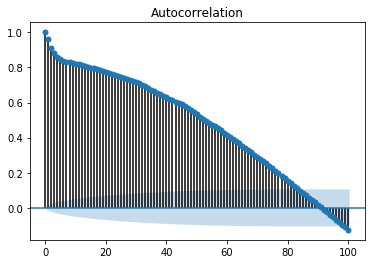

In [44]:
print(plot_acf(y_train_temp, lags=100))

Figure(432x288)


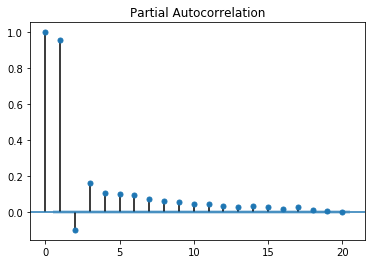

In [45]:
print(plot_pacf(y_train_flights, lags=20))

In [48]:
# Fit the model
ar_T = AutoReg(y_train_temp, lags=2)
res_T = ar_T.fit()
print(res_T.summary())

                            AutoReg Model Results                             
Dep. Variable:              Real_temp   No. Observations:                21939
Model:                     AutoReg(2)   Log Likelihood              -46467.983
Method:               Conditional MLE   S.D. of innovations              2.012
Date:                Tue, 28 Apr 2020   AIC                              1.399
Time:                        16:07:56   BIC                              1.400
Sample:                    01-03-1929   HQIC                             1.399
                         - 01-24-1989                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.6364      0.031     20.816      0.000       0.577       0.696
Real_temp.L1     1.0549      0.007    157.018      0.000       1.042       1.068
Real_temp.L2    -0.0993      0.007    -14.78

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [49]:
parameters = res_T.params

In [50]:
## construct walk-forward forecast

# create an empty list of predictions
predictions = []

# create a loop to predict the value for every timestep in y_test
for i in range(len(y_train_temp), len(df_istanbul)):
    predictions.append(parameters[0] + sum(df_istanbul.Real_temp[i-1:i].values * parameters[:0:-1].values))

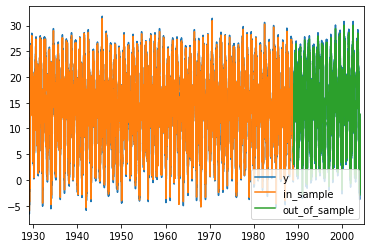

In [62]:
# Plot the three plots
plt.plot(df_istanbul.Real_temp, label='y')
plt.plot(res_T.predict(), label='in_sample' )
plt.plot(y_test_temp.index, predictions, label='out_of_sample')
plt.xlim(('01-01-1929', '01-01-2005'))
plt.legend()

In [59]:
res_T.predict()

1929-01-01          NaN
1929-01-02          NaN
1929-01-03    13.415213
1929-01-04    13.134721
1929-01-05    11.783226
1929-01-06    10.646455
1929-01-07     8.655842
1929-01-08     2.841581
1929-01-09     4.251534
1929-01-10     2.800733
1929-01-11     1.242006
1929-01-12     1.611873
1929-01-13     1.802990
1929-01-14     3.048996
1929-01-15     1.874940
1929-01-16     8.936518
1929-01-17    11.340282
1929-01-18    12.001698
1929-01-19     4.106138
1929-01-20    -0.644428
1929-01-21     2.087228
1929-01-22     1.351242
1929-01-23     0.767961
1929-01-24     0.089121
1929-01-25    -0.685277
1929-01-26     0.765524
1929-01-27     5.910876
1929-01-28    12.376622
1929-01-29    12.354140
1929-01-30    11.345156
                ...    
1988-12-26     6.999120
1988-12-27     4.190640
1988-12-28     7.623434
1988-12-29     8.380408
1988-12-30     4.694477
1988-12-31     4.926626
1989-01-01     6.413403
1989-01-02     6.379864
1989-01-03     2.572330
1989-01-04    -0.023862
1989-01-05     1

Figure(432x288)


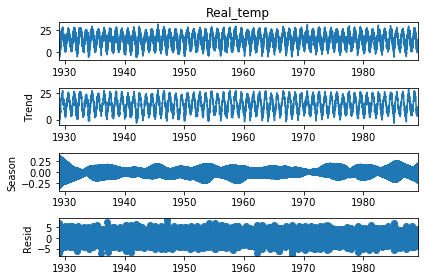

In [70]:
# Do a automatic decomposition
from statsmodels.tsa.seasonal import STL

decompose = STL(y_train_temp, seasonal=367)
decompose = decompose.fit()
print(decompose.plot())

Figure(432x288)


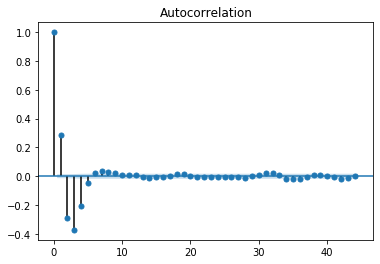

In [71]:
# Take the residuals for the analysis
series = decompose.resid
print(plot_acf(series))

Figure(432x288)


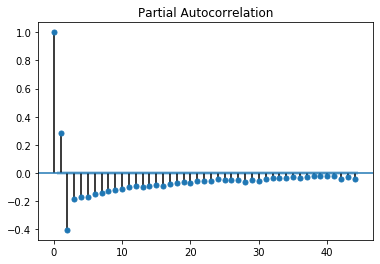

In [72]:
print(plot_pacf(series))

In [73]:
# Fit the model on the residuals
series_model = AutoReg(series, lags=2)
res_t_r = series_model.fit()
print(res_t_r.summary())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                            AutoReg Model Results                             
Dep. Variable:                  resid   No. Observations:                21939
Model:                     AutoReg(2)   Log Likelihood              -38027.811
Method:               Conditional MLE   S.D. of innovations              1.370
Date:                Tue, 28 Apr 2020   AIC                              0.629
Time:                        16:18:19   BIC                              0.631
Sample:                    01-03-1929   HQIC                             0.630
                         - 01-24-1989                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.009      0.014      0.989      -0.018       0.018
resid.L1       0.4018      0.006     65.083      0.000       0.390       0.414
resid.L2      -0.4047      0.006    -65.556      0.0

In [74]:
# reconstruct the values
pr = res_t_r.fittedvalues + decompose.seasonal + decompose.trend

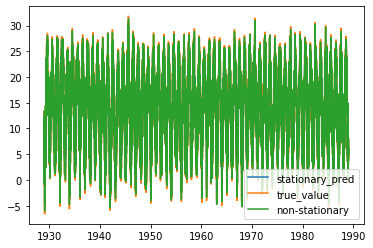

In [75]:
# Plot everything together
plt.plot(pr, label='stationary_pred')
plt.plot(y_train_temp, label='true_value')
plt.plot(res_T.predict(), label='non-stationary')
plt.legend()

In [77]:
# Compare the mean_squared_error of the two approaches
print(f'Stationarized time sereis: {mean_squared_error(y_train_temp[4:], pr[4:])}')
print(f'Non-Stationarized time sereis: {mean_squared_error(y_train_temp[4:], res_T.predict()[4:])}')

Stationarized time sereis: 1.8755902424289672
Non-Stationarized time sereis: 4.049878281519086
